In [72]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_fairness(file_path, CTT_values):
    # Carica i dati da un file CSV
    df = pd.read_csv(file_path)

    totFair = 0
    totFair1 = 0
    fairness_values = []

    # Applica il filtro 'responseMessage' == 'OK'
    df = df[df['responseMessage'] == 'OK']

    for thread_number in range(1, len(CTT_values) + 1):  # Loop from 1 to len(CTT_values)
        thread_group_name = f'Thread Group {thread_number}'
        mask = df.threadName.str.contains(thread_group_name)
        df_thread_group = df[mask]

        # Calcolo duration
        TimeStapMax = df_thread_group['timeStamp'].max()
        TimeStapMin = df_thread_group['timeStamp'].min()
        Duration = (TimeStapMax - TimeStapMin) / 1000
        Tot_Req_ok = df_thread_group['threadName'].count()
        Throughput = (Tot_Req_ok / Duration) * 360
        print(Throughput)

        # Get the corresponding CTT value for the current thread group
        CTT = CTT_values[thread_number - 1]

        Fair = Throughput / CTT
        totFair  += (Fair * Fair)
        totFair1 +=  Fair

        # Append fairness value to the list for visualization
        fairness_values.append(Fair)

    # Calculate the final fairness metric
    FairFin = (totFair1 * totFair1) / (len(CTT_values) * (totFair))

    # Visualize the fairness values
    bars = plt.barh([f'Group{i}' for i in range(1, len(CTT_values) + 1)], fairness_values, color='blue', height=0.5)  # Imposta height a tuo piacimento

    plt.xlabel('Normalized Throughput')
    plt.ylabel('Thread Group')
    plt.title('Fairness per ogni gruppo')

    # Aggiungi una linea verticale rossa al valore 1
    # plt.axvline(x=1, color='red', linestyle='--', linewidth=2)
    plt.gcf().set_size_inches(6, 4)  # Imposta le dimensioni desiderate (width, height)
    plt.savefig('foo.png', bbox_inches='tight')  # Imposta bbox_inches='tight' per evitare che le etichette vengano tagliate
    plt.show()
    return FairFin, fairness_values


1180.948968852863
857.1081001233874
103.02503550759968


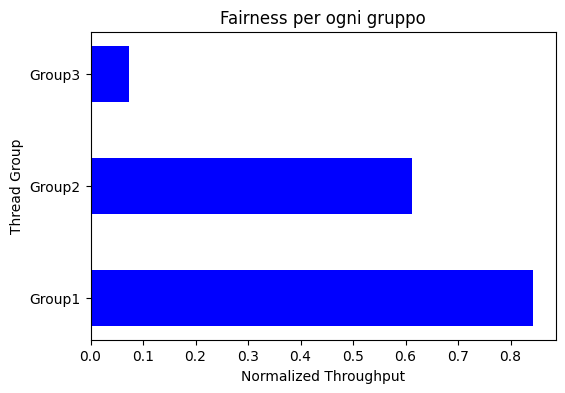

Fairness Metric: 0.7140919846680523


In [76]:
# Programma principale
if __name__ == "__main__":
  #1)Gruppi omogenei Small,Medium,Large
  file_path = '/content/Cattura1.csv'
  CTT_values = [1400, 1400, 1400]
  # Call the function and get the result and fairness values
  result, fairness_values = calculate_fairness(file_path, CTT_values)
  print("Fairness Metric:", result)

155.38464988004216
151.68965420376975
32.437497747395994


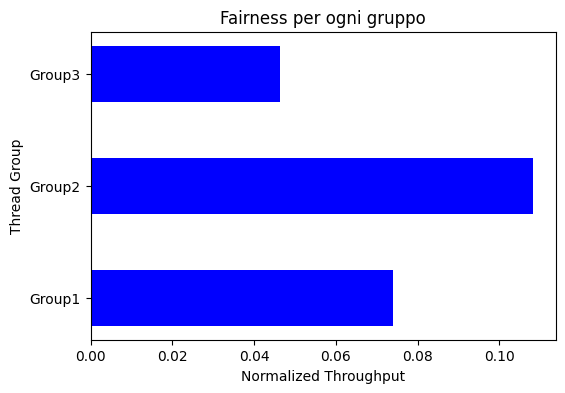

Fairness Metric: 0.9003126020207246


In [77]:
# Specify the file path
#2)Gruppi eterogenei in ogni thread Group Small,Medium,Large
file_path = '/content/Cattura2.csv'
CTT_values = [2100, 1400, 700]
# Call the function and get the result and fairness values
result, fairness_values = calculate_fairness(file_path, CTT_values)
print("Fairness Metric:", result)


111.09491929331287
76.02012297372835
68.74689684146202
89.1099367941146
41.03080909876188
82.82941506150262


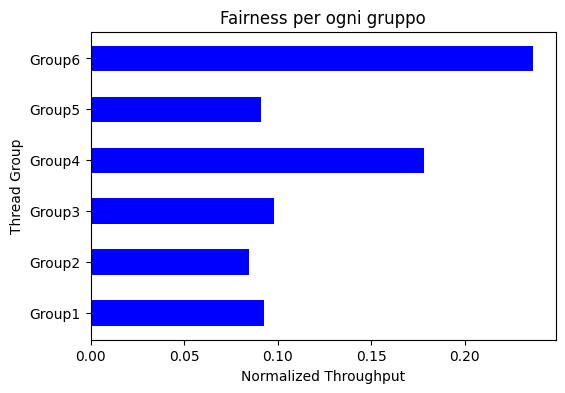

Fairness Metric: 0.8378400757444078


In [78]:
file_path = '/content/Cattura4.csv'
#3)Gruppi eterogenei in ogni thread Group Small,Medium,Large
CTT_values = [1200, 900, 700, 500,450, 350]
# Call the function and get the result and fairness values
result, fairness_values = calculate_fairness(file_path, CTT_values)
print("Fairness Metric:", result)